# Notebook of Factorio YOLO v0

This notebook allows you to run YOLO inference and view annotated results without opening new windows, directly in VS Code.

Steps:
- Configure model and image path
- Run inference
- Display annotated result in the cell below

Note: If you are on macOS and using Apple Silicon, it will try to use the `mps` device by default.


Repo root: ..
Model path: ../results/weights/best.pt
Image path: ../dataset/images/test/assembling-machine-2_0.83550115511753_1_nauvis_2913363151_27_0_30_3.jpg
Prefer MPS: True

image 1/1 /Users/lemonneko/Projects/airi-factorio/models/factorio-yolo-v0/notebooks/../dataset/images/test/assembling-machine-2_0.83550115511753_1_nauvis_2913363151_27_0_30_3.jpg: 640x640 1 assembling-machine-2, 10.4ms
Speed: 1.9ms preprocess, 10.4ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)


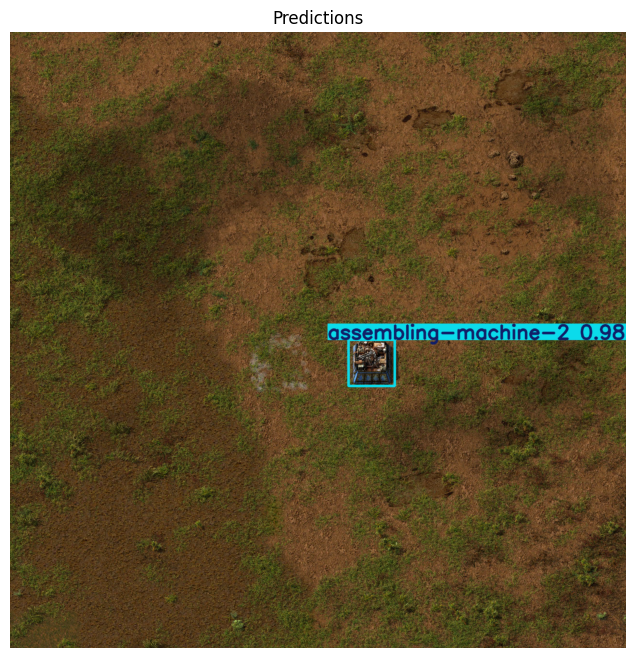

assembling-machine-2 0.98


In [23]:
from pathlib import Path
import platform
from ultralytics import YOLO
import matplotlib.pyplot as plt

REPO_ROOT = Path("..")
DATASET_DIR = REPO_ROOT / "dataset"
SRC_DIR = REPO_ROOT / "src"
RESULTS_DIR = REPO_ROOT / "results"
WEIGHTS_DIR = RESULTS_DIR / "weights"

model_path = WEIGHTS_DIR / "best.pt"
image_path = DATASET_DIR / "images/test/assembling-machine-2_0.83550115511753_1_nauvis_2913363151_27_0_30_3.jpg"

print(f"Repo root: {REPO_ROOT}")
print(f"Model path: {model_path}")
print(f"Image path: {image_path}")

use_mps: bool = platform.system() == "Darwin"
print(f"Prefer MPS: {use_mps}")

model = YOLO(str(model_path))

results = model.predict(source=str(image_path), device="mps" if 'use_mps' in globals() and use_mps else None)
result = results[0]

annotated_bgr = result.plot()
annotated_rgb = annotated_bgr[..., ::-1]

plt.figure(figsize=(8, 8))
plt.imshow(annotated_rgb)
plt.axis('off')
plt.title('Predictions')
plt.show()

boxes = result.boxes
for b in boxes:
    cls_id = int(b.cls[0].item())
    conf = float(b.conf[0].item())
    print(result.names[cls_id], f"{conf:.2f}")
